<center> <h1> IESO ML Project </h1> </center>

<center> notebook two <br> Exploratory Data Analysis / Data Visuaization</center>

Prepared by Behrouz ShakeriFard <br>
April 2024

<hr>

In this notebook we will explore the data that we cleaned and organized in the last notebook. <br>

Before beginning our Exploratory Data Analysis (EDA), let's import a few usefull packages.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Let's import our data
df = pd.read_csv('df_ieso_cleaned_2021.csv')

In [5]:
# sanity check 
df.head()

,Unnamed: 0,Date Time,Market Demand,Ontario Demand,HOEP,Output,capability
0,0,2021-01-01 01:00:00,16057,14112,31.74,14301.0,26203.0
1,1,2021-01-01 02:00:00,15516,13504,17.61,13786.0,26494.0
2,2,2021-01-01 03:00:00,15185,13155,14.36,13507.0,26587.0
3,3,2021-01-01 04:00:00,14940,12892,10.26,13505.0,26749.0
4,4,2021-01-01 05:00:00,14802,12798,6.03,12881.0,26843.0


In [6]:
# let's do a little clean up
df.set_index('Date Time', inplace=True)


In [7]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [8]:
# sanity check 
df.head()

,Market Demand,Ontario Demand,HOEP,Output,capability
Date Time,,,,,
2021-01-01 01:00:00,16057,14112,31.74,14301.0,26203.0
2021-01-01 02:00:00,15516,13504,17.61,13786.0,26494.0
2021-01-01 03:00:00,15185,13155,14.36,13507.0,26587.0
2021-01-01 04:00:00,14940,12892,10.26,13505.0,26749.0
2021-01-01 05:00:00,14802,12798,6.03,12881.0,26843.0


In [9]:
df.dtypes

Market Demand       int64
Ontario Demand      int64
HOEP              float64
Output            float64
capability        float64
dtype: object

# Understanding our Data

As with any scientific endeavor, we need to understand:

1. the extent of variations of the variables;
2. the variations themselves;
3. and the relationships between the variables.

Let's pick a few dates and have a quick look.

# <center> Demand </center>

For this analysis, we will use Market Demand as the variable of interest for representing total demand. This is because (as we will see later) we will need to look at total generation as well; hence, we can allow the difference between total demand and local generation to represent electricity imports necessary for meeting the short-comings of the system.

It would be nice to see the shape of demand, and look for possible patterns in demand fluctuations in our 24-hour cycles. For this purpose, we can construct a loop that goes through twenty four rows, for any given day.

In [20]:
start_time = '2021-01-15 02:00:00'
end_time = '2021-01-16 01:00:00'

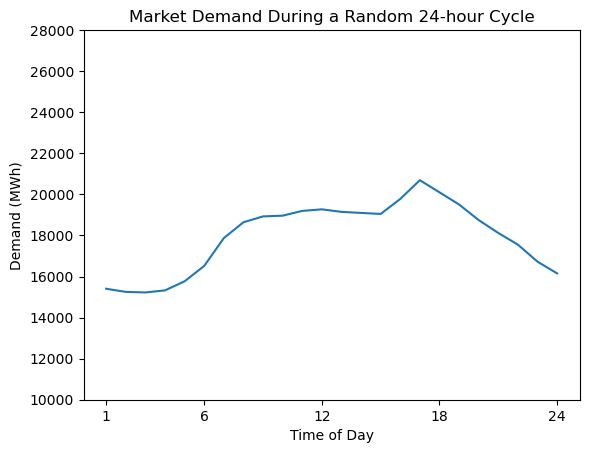

In [27]:
subset = df.loc[start_time:end_time,'Market Demand']
subset.index = range(1,25)

plt.xlabel('Time of Day')
plt.ylabel('Demand (MWh)')
plt.ylim(10000,28000)
plt.xticks([1,6,12,18,24])
plt.title('Market Demand During a Random 24-hour Cycle')
subset.plot()
plt.show()

very cool. 

## Seasonal Variations:

Let's seasonal variations.


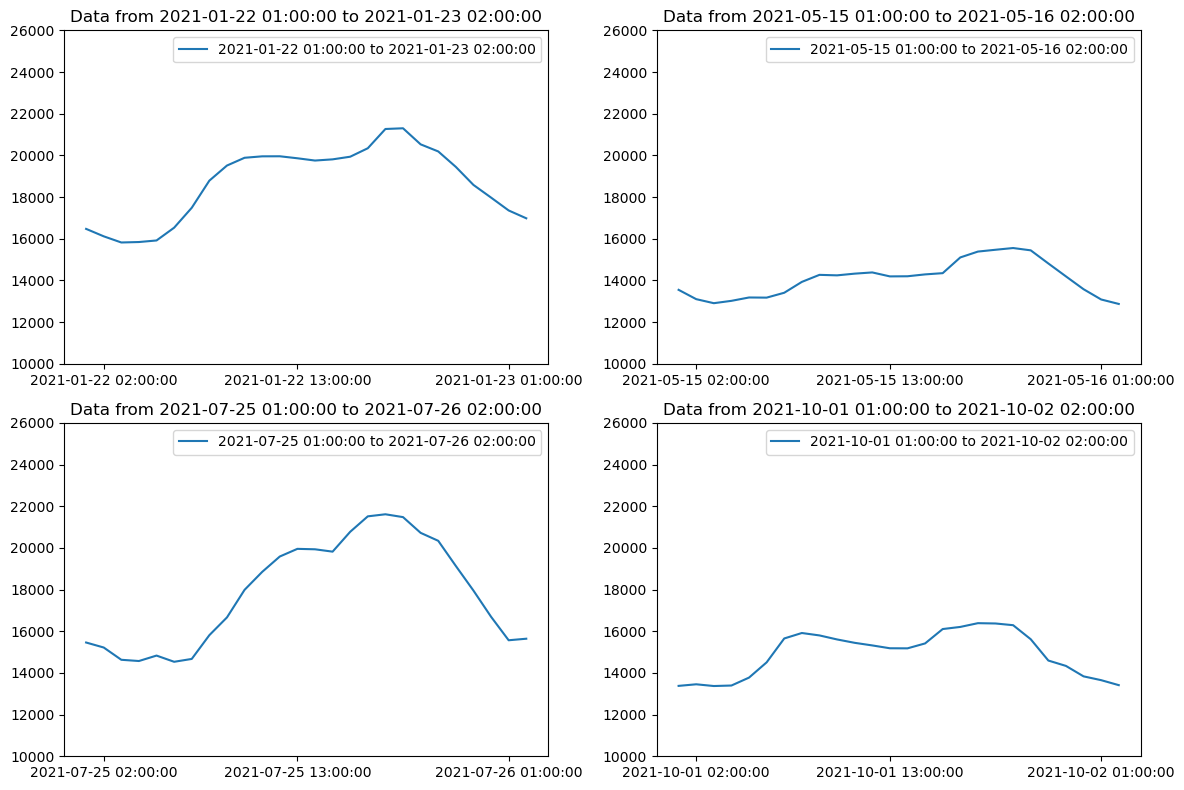

In [52]:
date_ranges = [('2021-01-22 01:00:00', '2021-01-23 02:00:00'), 
               ('2021-05-15 01:00:00', '2021-05-16 02:00:00'), 
               ('2021-07-25 01:00:00', '2021-07-26 02:00:00'), 
               ('2021-10-01 01:00:00', '2021-10-02 02:00:00')]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, (start_date, end_date) in enumerate(date_ranges):
    ax = axs[i//2, i%2]  # Calculate the position of the subplot
    data = df.loc[start_date:end_date]  # Extract data for the date range
    ax.plot(data.index, data['Market Demand'], label=f'{start_date} to {end_date}')  # Plot the data
    ax.set_title(f"Data from {start_date} to {end_date}")
    ax.legend()
    ax.set_ylim(10000,26000)
    ax.set_xticks([1,12,24])

plt.tight_layout()
plt.show()

We can make two observations:
1. Significant variations in the overall (24-hour cycle) LEVEL of demand;
2. Variations in the SHAPE of demand, indicating, time of day is a significant contributor to the level of demand.


A better way of showing this, would be to display the 24-hour average of each of these days.

## Seasonal Means

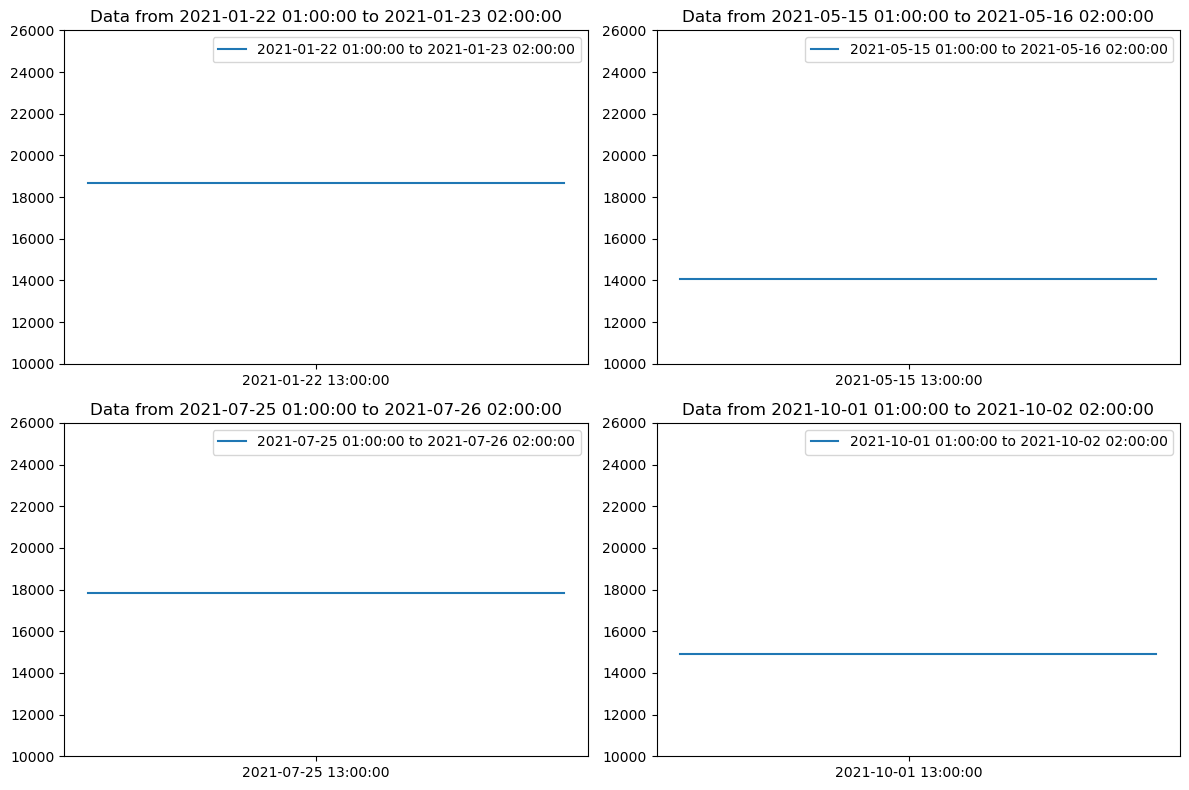

In [56]:
date_ranges = [('2021-01-22 01:00:00', '2021-01-23 02:00:00'), 
               ('2021-05-15 01:00:00', '2021-05-16 02:00:00'), 
               ('2021-07-25 01:00:00', '2021-07-26 02:00:00'), 
               ('2021-10-01 01:00:00', '2021-10-02 02:00:00')]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, (start_date, end_date) in enumerate(date_ranges):
    ax = axs[i//2, i%2]  # Calculate the position of the subplot
    data = df.loc[start_date:end_date]  # Extract data for the date range
    mean_value = data['Market Demand'].mean()
    ax.plot(data.index, [mean_value]*26, label=f'{start_date} to {end_date}')  # Plot the data
    ax.set_title(f"Data from {start_date} to {end_date}")
    ax.legend()
    ax.set_ylim(10000,26000)
    ax.set_xticks([12])

plt.tight_layout()
plt.show()

Very cool. 

There is reasonable ground to believe that seasonal variations (most probably due to temperature changes) have an impact on demand. Next, we will take a quick look at the entirety of data, in a HeatMap.

## Looking from Annual Perspective

In [63]:
# First, we need to make sure our index column is in date-time dtype
df.index = pd.to_datetime(df.index)

In [65]:
df.index

DatetimeIndex(['2021-01-01 01:00:00', '2021-01-01 02:00:00',
               '2021-01-01 03:00:00', '2021-01-01 04:00:00',
               '2021-01-01 05:00:00', '2021-01-01 06:00:00',
               '2021-01-01 07:00:00', '2021-01-01 08:00:00',
               '2021-01-01 09:00:00', '2021-01-01 10:00:00',
               ...
               '2021-12-31 15:00:00', '2021-12-31 16:00:00',
               '2021-12-31 17:00:00', '2021-12-31 18:00:00',
               '2021-12-31 19:00:00', '2021-12-31 20:00:00',
               '2021-12-31 21:00:00', '2021-12-31 22:00:00',
               '2021-12-31 23:00:00', '2021-12-31 00:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=8760, freq=None)

In [67]:
# implementing the pivot
pivot_demand = df.pivot_table(index=df.index.date,columns=df.index.time,values="Ontario Demand")

In [68]:
# sanity check
pivot_demand

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2021-01-01,14476,14112,13504,13155,12892,12798,12891,13188,13570,13820,...,15117,15391,15928,16544,17120,16774,16385,16206,15888,15269
2021-01-02,14236,13827,13453,13177,13145,13192,13140,13477,14173,14661,...,15914,16003,16178,16800,17860,17594,16914,16387,15752,15083
2021-01-03,14424,13620,13214,12962,12834,12802,13025,13440,14038,14596,...,16366,16296,16459,17056,18098,17672,17082,16536,15956,15196
2021-01-04,14902,13765,13538,13199,13121,13231,13757,14922,16075,16877,...,17664,17535,17767,18272,19160,18652,18161,17319,16617,15890
2021-01-05,15059,14278,13901,13538,13530,13634,14237,15241,16427,17150,...,17663,17558,17844,18382,19275,18828,18286,17825,17086,16046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,14707,14054,13475,13460,13092,13472,13814,14005,14710,15408,...,16994,17074,17466,18038,18497,18236,17904,17129,16432,15737
2021-12-28,14675,13990,13592,13535,13380,13432,13575,14305,14988,15380,...,16616,16873,16976,17662,18182,17657,17034,16904,16347,15549
2021-12-29,14434,13996,13565,13398,13278,13459,13782,14488,15378,15798,...,16704,16662,16995,17692,18522,17829,17291,16831,16122,15171
2021-12-30,14506,13822,13469,13279,13069,13258,13710,14557,15306,15838,...,16446,16583,16662,17355,18162,17784,17393,16992,16341,15432


Text(0.5, 1.0, 'Annual Average Demand - expressed in a 24-hour cycle')

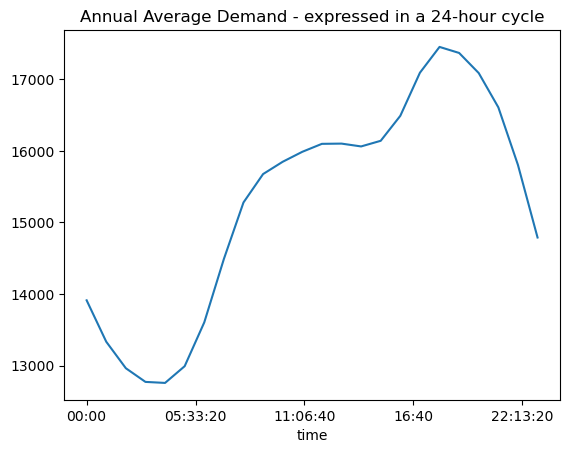

In [69]:
pivot_demand.mean().plot()
plt.title('Annual Average Demand - expressed in a 24-hour cycle')

# Heat Map

Let's import the seaborn package for our next graph.

In [73]:
import seaborn as sns

In [71]:
# creating a new dataframe for exploring significant deviations from the hourly average
demand_deviation = pivot_demand - pivot_demand.mean()

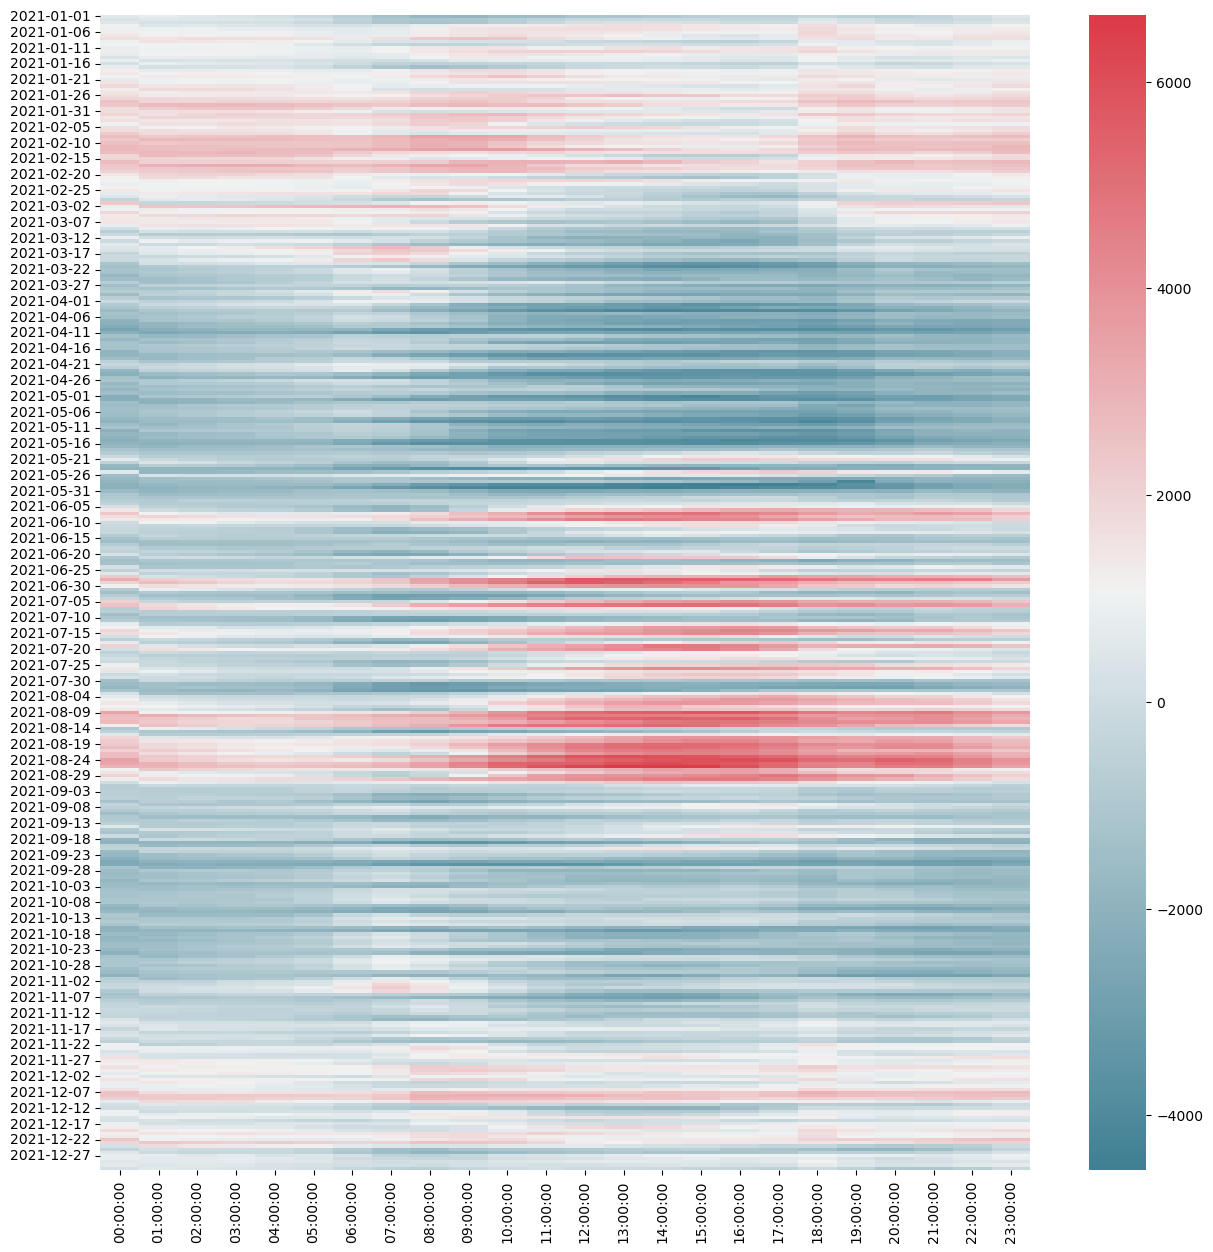

In [74]:
# setting the size of graph
plt.figure(figsize=(15,15))

# Define the custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# producing the graph
sns.heatmap(demand_deviation, cmap=cmap)
plt.show()

Red or lighter hues such as pink are indicating significant higher demand with comparison with average demand during the year. July and August also contain quite a bit of red spots, indicating that residents respond to warm weather by turning the air conditioner on.


Gredients that are closer to blue or green can be observed during April, early May, late September and October, when temperatures outside are expected to be fairly close to the temperatures that are considered comfortable room temperatures. In other words, temperatures around 15 degrees celsius to 25 degrees celsius are associated with less than average demand for electricity.

# <center> Price</center>

Hourly Ontario Energy Price (HOEP) is set by the system operator, in this case, Ontario's Independent System Operator, or IESO.

Price is a numeric variable that reflects the market fluctuations. As demand fluctuates, energy producers (generators) chase market demand. IESO ensures that generators have sufficient incentive to enter the market when demand is high, by increasing the price, and thus, bringing sufficient incentive to the market for producers (generators) to start producing electricity.

The exact mechanism through which IESO sets the price is not discussed in this notebook, and is of no interest. Because the objective is to predict price without any knowledge of that mechanism. In other words, the aim of this project is to predict price, an hour from now, in the absence of any knowledge regarding how IESO sets the price.

Now let's start looking at some data.


In [83]:
start_time = '2021-02-25 02:00:00'
end_time = '2021-02-26 01:00:00'

In [76]:
df.columns

Index(['Market Demand', 'Ontario Demand', 'HOEP', 'Output', 'capability'], dtype='object')

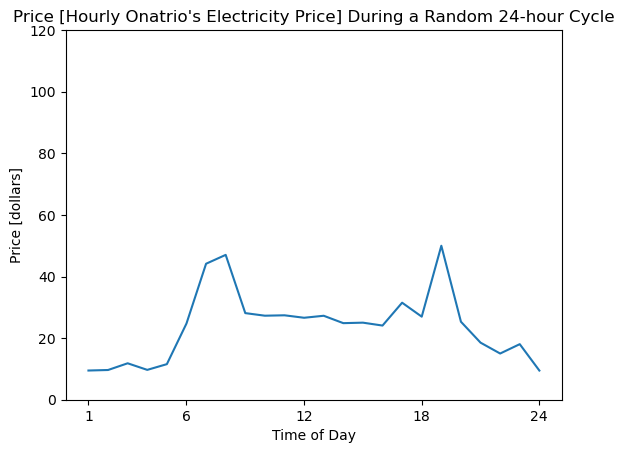

In [88]:
subset = df.loc[start_time:end_time,'HOEP']
subset.index = range(1,25)

# x-axis label
plt.xlabel('Time of Day')
# y-axis label 
plt.ylabel('Price [dollars]')
# values on the y-axis
plt.ylim(0,120)
# values on the x-axis
plt.xticks([1,6,12,18,24])
# title of the plot/chart
plt.title('Price [Hourly Onatrio\'s Electricity Price] During a Random 24-hour Cycle')
# producing all four plots
subset.plot()
plt.show()

Very cool. Now, let's look at a few different dates spread across all four seasons.

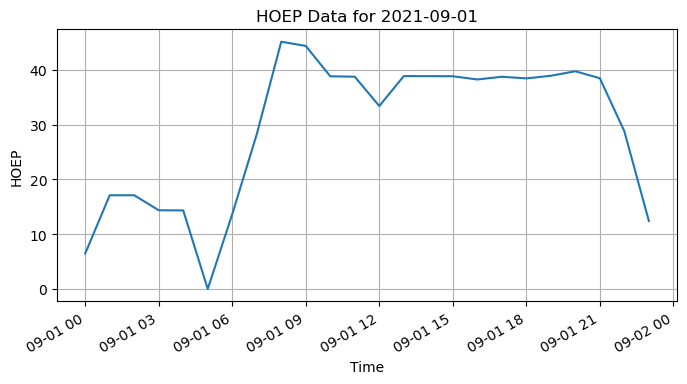

In [90]:
specific_date = '2021-09-01'  # Specify the date in YYYY-mm-dd format

# Select data for the specific date
data_for_specific_date = df[df.index.date == pd.to_datetime(specific_date).date()]

# Plot the selected data
data_for_specific_date['HOEP'].plot(figsize=(8, 4))
plt.xlabel('Time')
plt.ylabel('HOEP')
plt.title(f'HOEP Data for {specific_date}')
plt.grid(True)
plt.show()

In [96]:
dates = ['2021-01-20','2021-04-20','2021-08-20','2021-10-20']



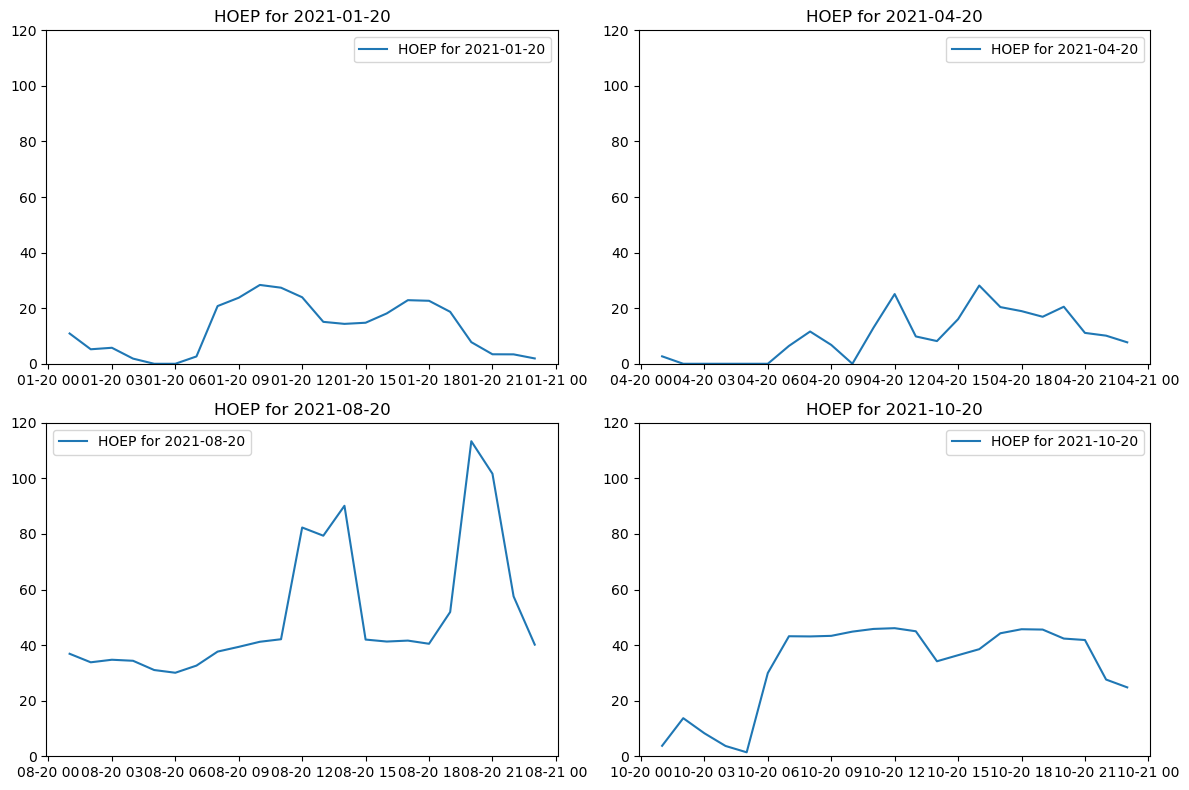

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, date in enumerate(dates):
    ax = axs[i//2, i%2]  # Calculate the position of the subplot
    data_for_date = df[df.index.date == pd.to_datetime(date).date()][:-1]  # Select data for the date
    ax.plot(data_for_date.index, data_for_date['HOEP'], label=f'HOEP for {date}')  # Plot the data
    ax.set_title(f'HOEP for {date}')
    ax.legend()
    ax.set_ylim(0, 120)  # Set y-axis limits

plt.tight_layout()
plt.show()

Right! As expected we see variations in price level, both across hours of the day, and seasons of the year. 

We can Now look at price level from an Annual perspective.

## Annual Perspective

In [102]:
# implementing the pivot
pivot_price = df.pivot_table(index=df.index.date,columns=df.index.time,values="HOEP")

Text(0.5, 1.0, 'Annual Average Price - expressed in a 24-hour cycle')

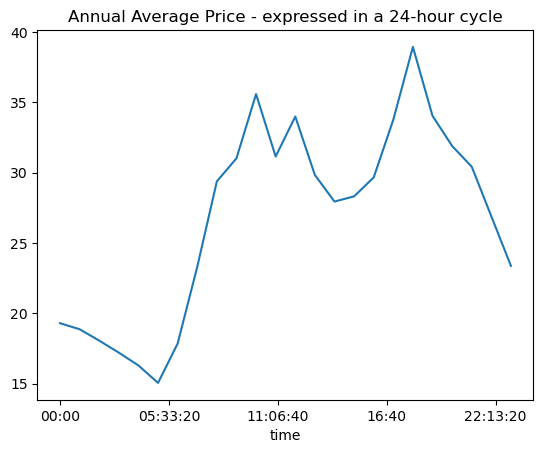

In [144]:
pivot_price.mean().plot()
plt.title('Annual Average Price - expressed in a 24-hour cycle')

In [104]:
price_spikes_from_pivot = pivot_price - pivot_price.mean()

<Axes: title={'center': 'Heatmap showing all prices - spikes are dark or red'}>

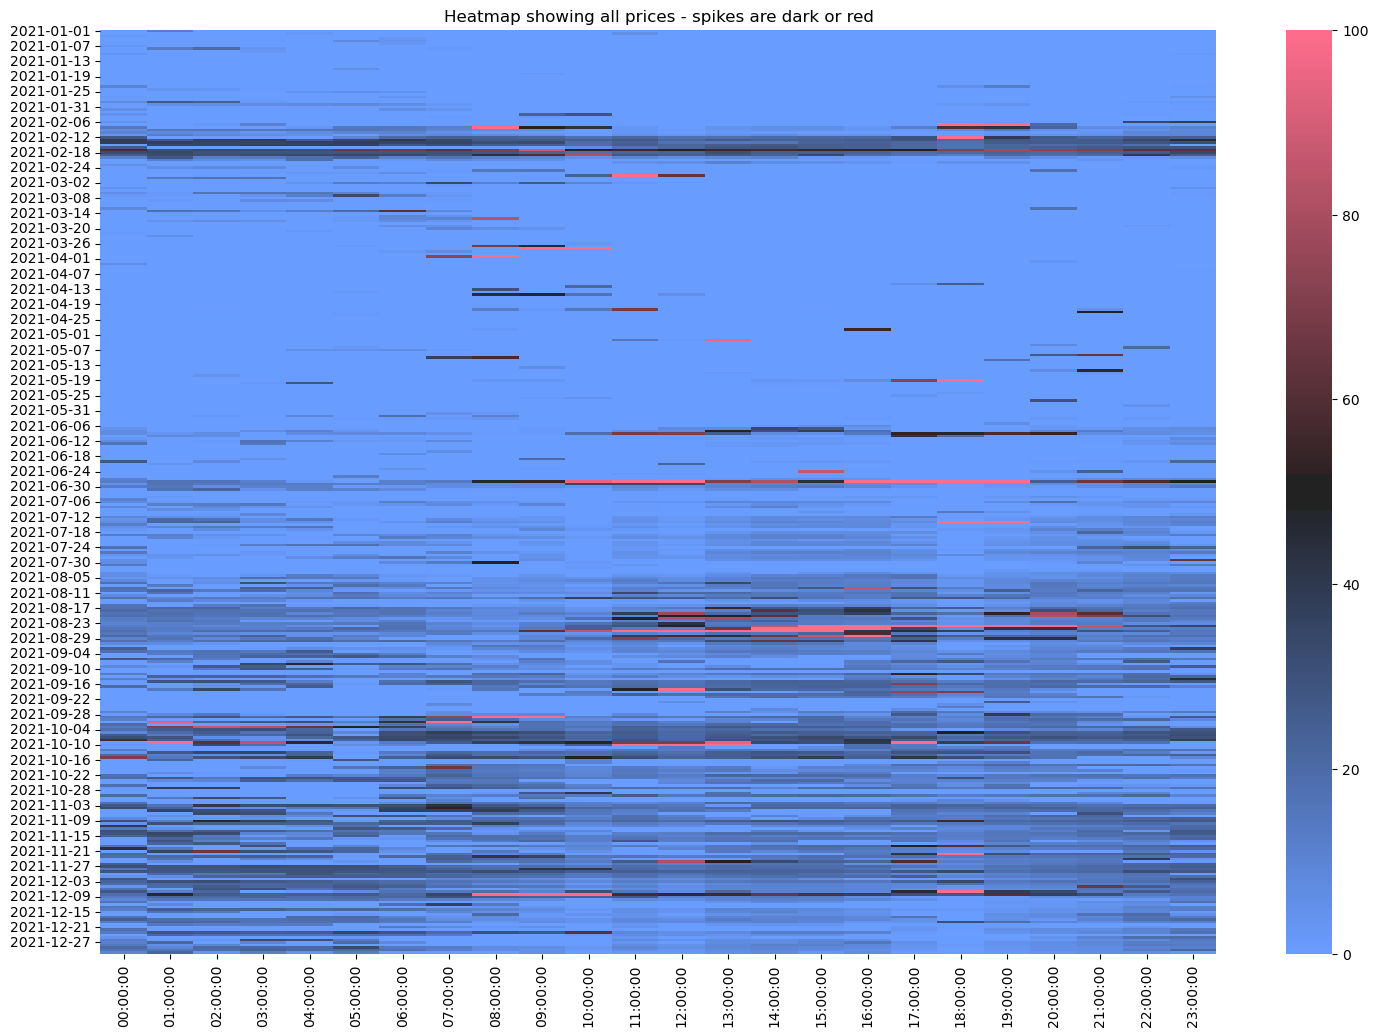

In [113]:
# Set the size of the graph
plt.figure(figsize=(18,12))

# color gradient
cmap = sns.diverging_palette(255, 2, s=100, l=65, sep=10, center="dark", as_cmap=True)

# title of the graph
plt.title('Heatmap showing all prices - spikes are dark or red')

# Produce the Seaborn Heat Map
sns.heatmap(price_spikes_from_pivot, cmap = cmap, vmin=0, vmax=100)

Significant deviation from the average prices can be observed during the months of January, mid April, and throughout the summer (entirety of July and August, and even some price spikes for September).

<hr>

## What does the Price distribution look like?

We don't know what does the distribution look like. Distribution could be Guassian, or it could be skewed to either side. We can use a histogram to look at the distribution. 

Remember, a Guassian distribution with narrow and thin tails would translate into a very narrow potential for electricity bill reduction, and consequently, a negligible business opportunity.

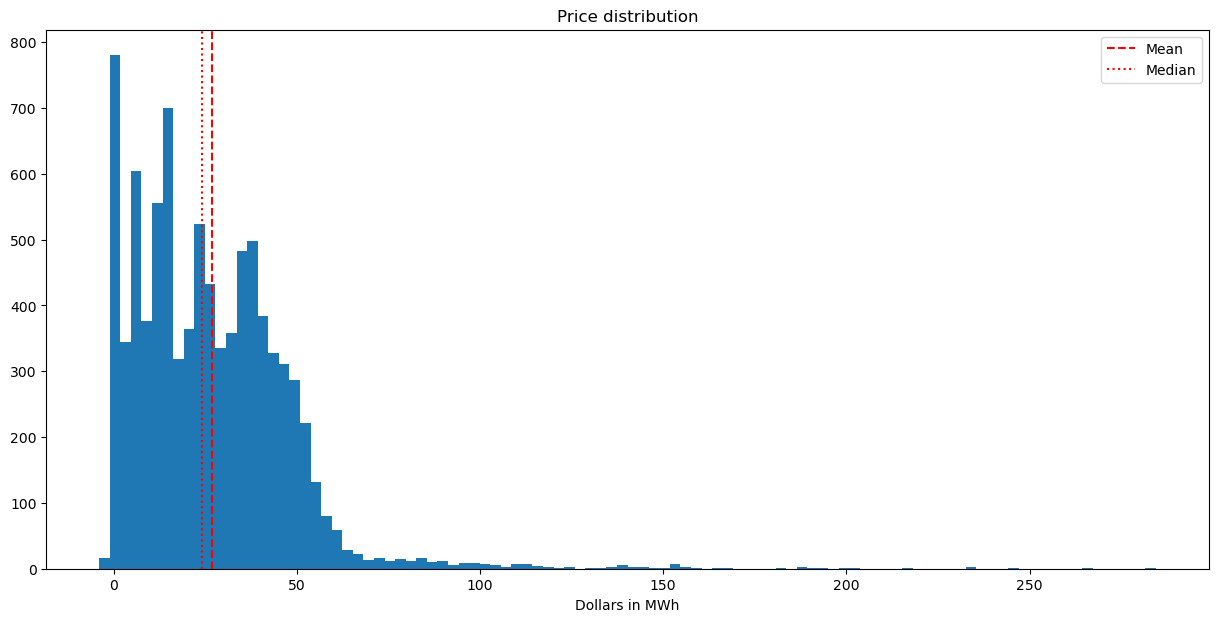

In [120]:
# initiate the plot and setting the size
plt.figure(figsize=(15,7))

# filtering out unnecessary bits of data
filtered_data = df[df['HOEP'] <= 300]['HOEP']
# specifying the data column and plot details
plt.hist(filtered_data, bins=100)

# let's get the mean and median values
mean_value = df['HOEP'].mean()
median_value = df['HOEP'].median()
# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='red', linestyle=':', label='Median')

# x-axis title
plt.xlabel('Dollars in MWh')
#title for the plot
plt.title('Price distribution')
plt.legend()
# show the plot
plt.show()

One of the central questions of this project (and by extention, the business opportunity that it presents) is the distribution of prices. Large frequency of low prices (prices below $10 for each MWh of electricity) create an "Arbitrage-like" opportunity for consumers to buy more than they need, store in a storage unit (large-capacity Lithium-ion bank) and utilize the storage when prices go beyond normal.

Essentially, if each household chooses the two thresholds (upperbound and lowerbound of consumption) optimally, the opportunity to buy cheap and disengage from the market during price spikes is an opportunity for saving money for the household, as well as an opportunity for the entreprenuer to generate income through bringing this service to the households, and give them the tools needed for reducing cost, while simultanously improving system reliability for the electricity grid. Furthermore, this project could contribute to reducing greenhouse-gas emissions in the province (natural gas is often used in order to respond to short-notice positive shocks to demand), and create employment for technicians who would install the necessary hardware.

## Mean, Median, and mode

In [121]:
df['HOEP'].mean()

26.74762671232877

In [122]:
df['HOEP'].median()

24.05

In [123]:
df['HOEP'].mode()

0    0.0
Name: HOEP, dtype: float64

Very Cool!

The median value is particularly interesting. Even though prices up to $50 for each MW/h are common, half of all recorded proces for 2021 are below 24 dollars.

<hr>

Let's create a few more intersting line charts.

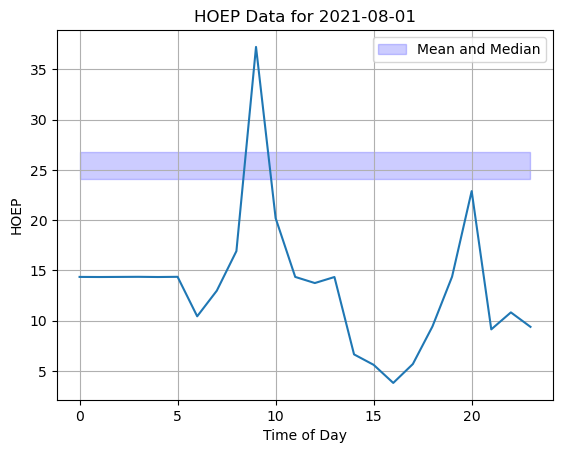

In [133]:
specific_date = '2021-08-01'  # Specify the date in YYYY-mm-dd format

# Select data for the specific date
data_for_specific_date = df[df.index.date == pd.to_datetime(specific_date).date()]
x = np.arange(24)
# Plot the selected data

plt.figure()
plt.plot(x,data_for_specific_date['HOEP'])

# Fill the area between median and mean
plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')
plt.xlabel('Time of Day')
plt.ylabel('HOEP')
plt.title(f'HOEP Data for {specific_date}')
plt.grid(True)
plt.legend()
plt.show()

In [140]:
def show_me_price(date):
    # Select data for the specific date
    data_for_specific_date = df[df.index.date == pd.to_datetime(date).date()]
    
    x = np.arange(24)
    # Plot the selected data
    plt.figure()
    plt.plot(x,data_for_specific_date['HOEP'])

    # Fill the area between median and mean
    plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')
    plt.xlabel('Time of Day')
    plt.ylabel('HOEP')
    plt.title(f'HOEP Data for {date}')
    plt.grid(True)
    plt.legend()
    plt.show()

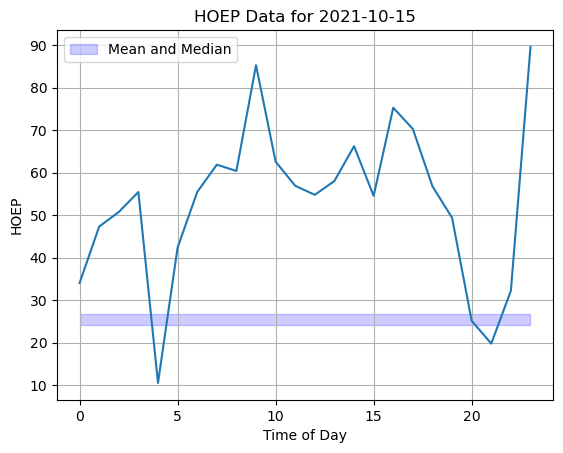

In [141]:
date = '2021-10-15'
show_me_price(date)

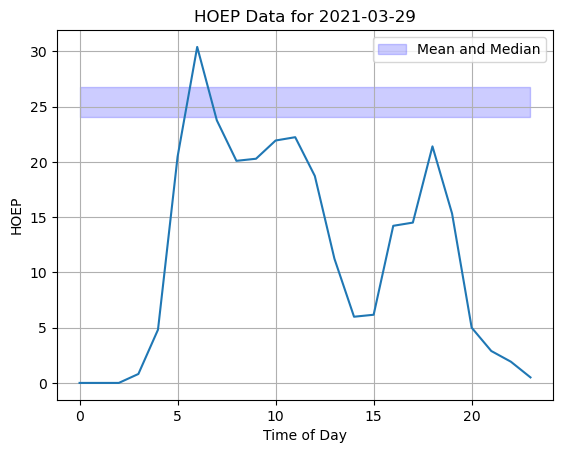

In [142]:
show_me_price('2021-03-29')

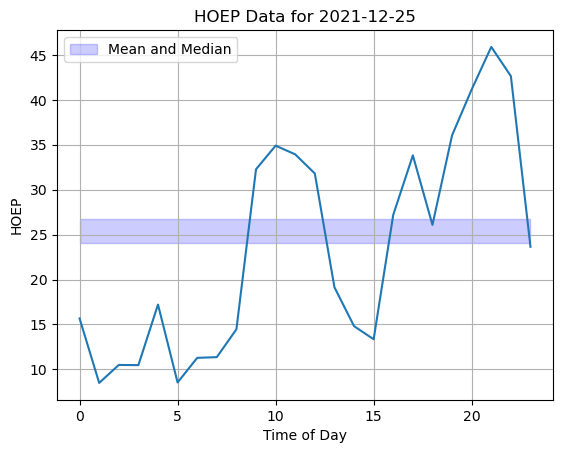

In [143]:
show_me_price('2021-12-25')

Very Cool.

We can Observe that most of the time, hourly proce of electricity remains below $50. This should become useful when we define our target, in the next notebook.

<hr>

# <center> Generator's Output and Capacity </center>

In [145]:
# sanity check
df.head()

,Market Demand,Ontario Demand,HOEP,Output,capability
Date Time,,,,,
2021-01-01 01:00:00,16057,14112,31.74,14301.0,26203.0
2021-01-01 02:00:00,15516,13504,17.61,13786.0,26494.0
2021-01-01 03:00:00,15185,13155,14.36,13507.0,26587.0
2021-01-01 04:00:00,14940,12892,10.26,13505.0,26749.0
2021-01-01 05:00:00,14802,12798,6.03,12881.0,26843.0



We have looked at demand and price. Next, we will look at supply of electricity to the market.

Generator Output and Capacity data provides close-to-real-time output levels for Ontario’s generators
registered as a market participant, and their capacity to produce. It is published
hourly, as soon as the data is available, containing data from generators with
capacities 20 MW or greater, registered with the IESO. For this analysis we are using the same year data (2018), available as excel sheets. 

More information is available here: http://reports.ieso.ca/docrefs/helpfile/GenOutputCapability_h4.pdf


<hr>

## A few words about the market

As mentioned earlier, electricity market is rarely in equilibrium. Market demand fluctuates according to activities in the economy that demand electricity. System's operator (IESO) provides incentive to registered generators to join the market, and that incentive is price. In other words, price is both the mechanism through which signals are transmitted, and also the evidence of an imbalance in the system.

But generation alone (supply) cannot provide us with adequate information. Just like an economy that experiences inflation  - as the total output (GDP) gets close to the potential output (full employment) - electricity market experiences a similar phenomenon as electricity generation get close to the capacity to generate (prices inflate).

Therefore, having a variable that expresses how close the market is to its full potential (output/capacity ratio) can be useful.

In order to construct such variable, we need total (sum of) capacities in the system, and total (sum of) output in the system. 

<hr>
Next, let'stake a look at output data.

In [149]:
def show_me_output(date):
    # Select data for the specific date
    data_for_specific_date = df[df.index.date == pd.to_datetime(date).date()]
    
    x = np.arange(24)
    # Plot the selected data
    plt.figure()
    plt.plot(x,data_for_specific_date['Output'])

    plt.xlabel('Time of Day')
    plt.ylabel('Output')
    plt.ylim(8000,24000)
    plt.title(f'Output Data for {date}')
    plt.grid(True)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


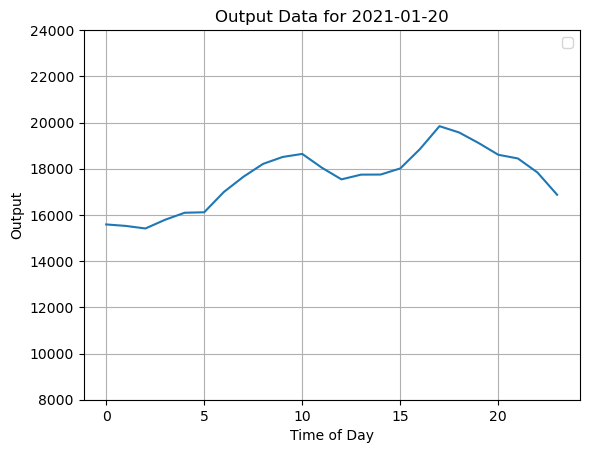

In [150]:
show_me_output('2021-01-20')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


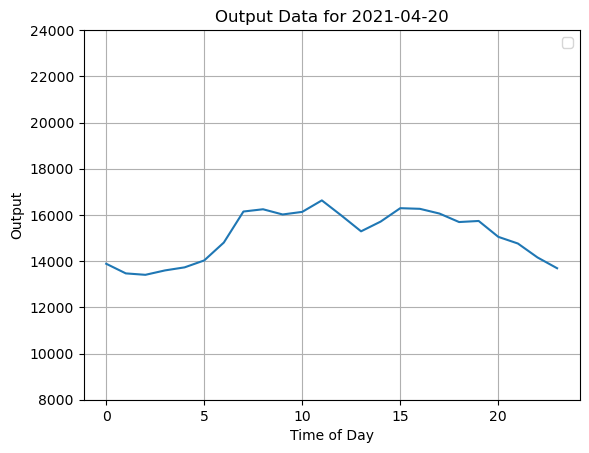

In [151]:
show_me_output('2021-04-20')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


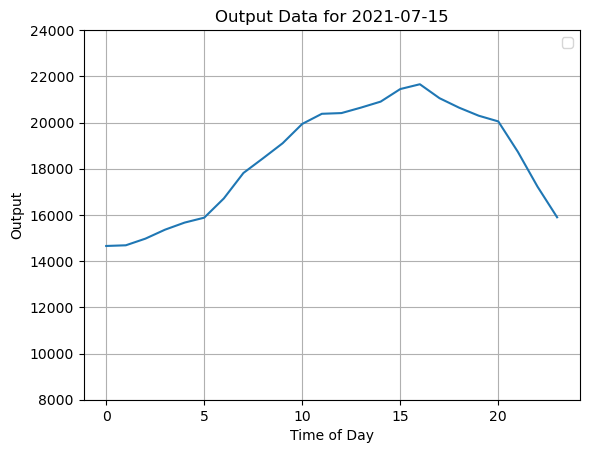

In [152]:
show_me_output('2021-07-15')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


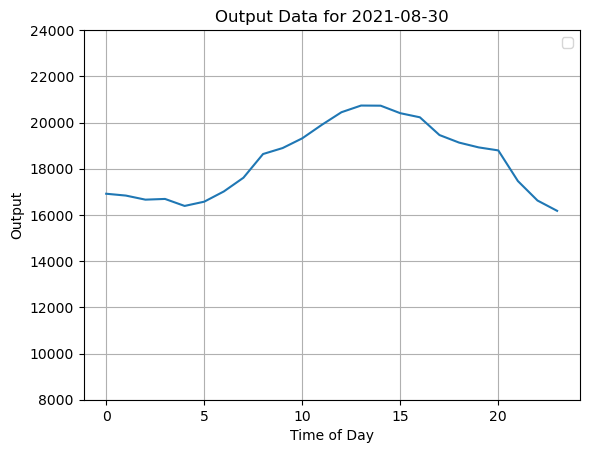

In [153]:
show_me_output('2021-08-30')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


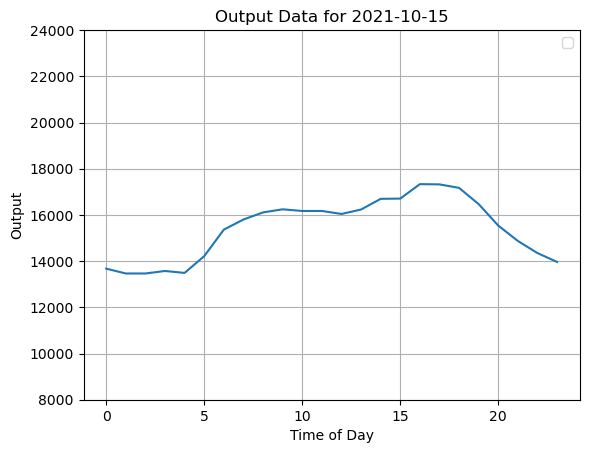

In [154]:
show_me_output('2021-10-15')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


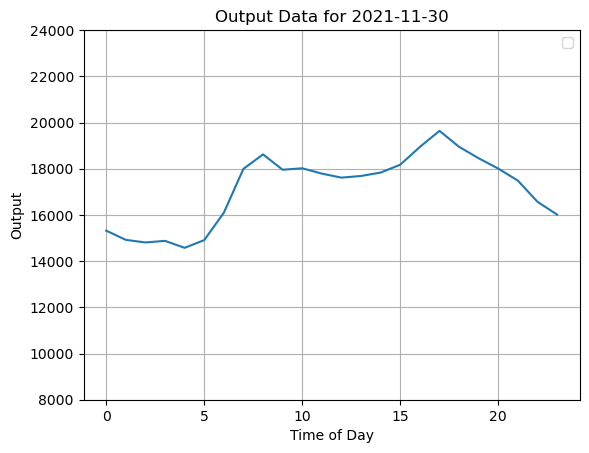

In [155]:
show_me_output('2021-11-30')

Very cool.

Let's move on to the next step, which is the pivot table, average hourly output values, and our HeatMap.

In [156]:
# implementing the pivot
pivot_output = df.pivot_table(index=df.index.date,columns=df.index.time,values="Output")

Text(0.5, 1.0, 'Annual Average Output - expressed in a 24-hour cycle')

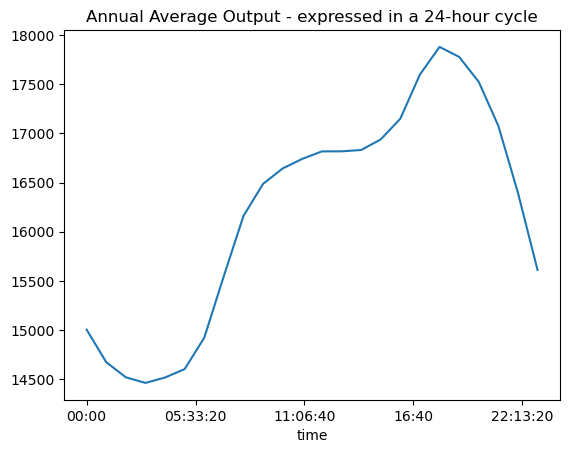

In [157]:
pivot_output.mean().plot()
plt.title('Annual Average Output - expressed in a 24-hour cycle')

In [158]:
# creating a new dataframe for exploring significant deviations from the hourly average
output_deviation = pivot_output - pivot_output.mean()

<Axes: title={'center': 'Heatmap showing all prices - spikes are dark or red'}>

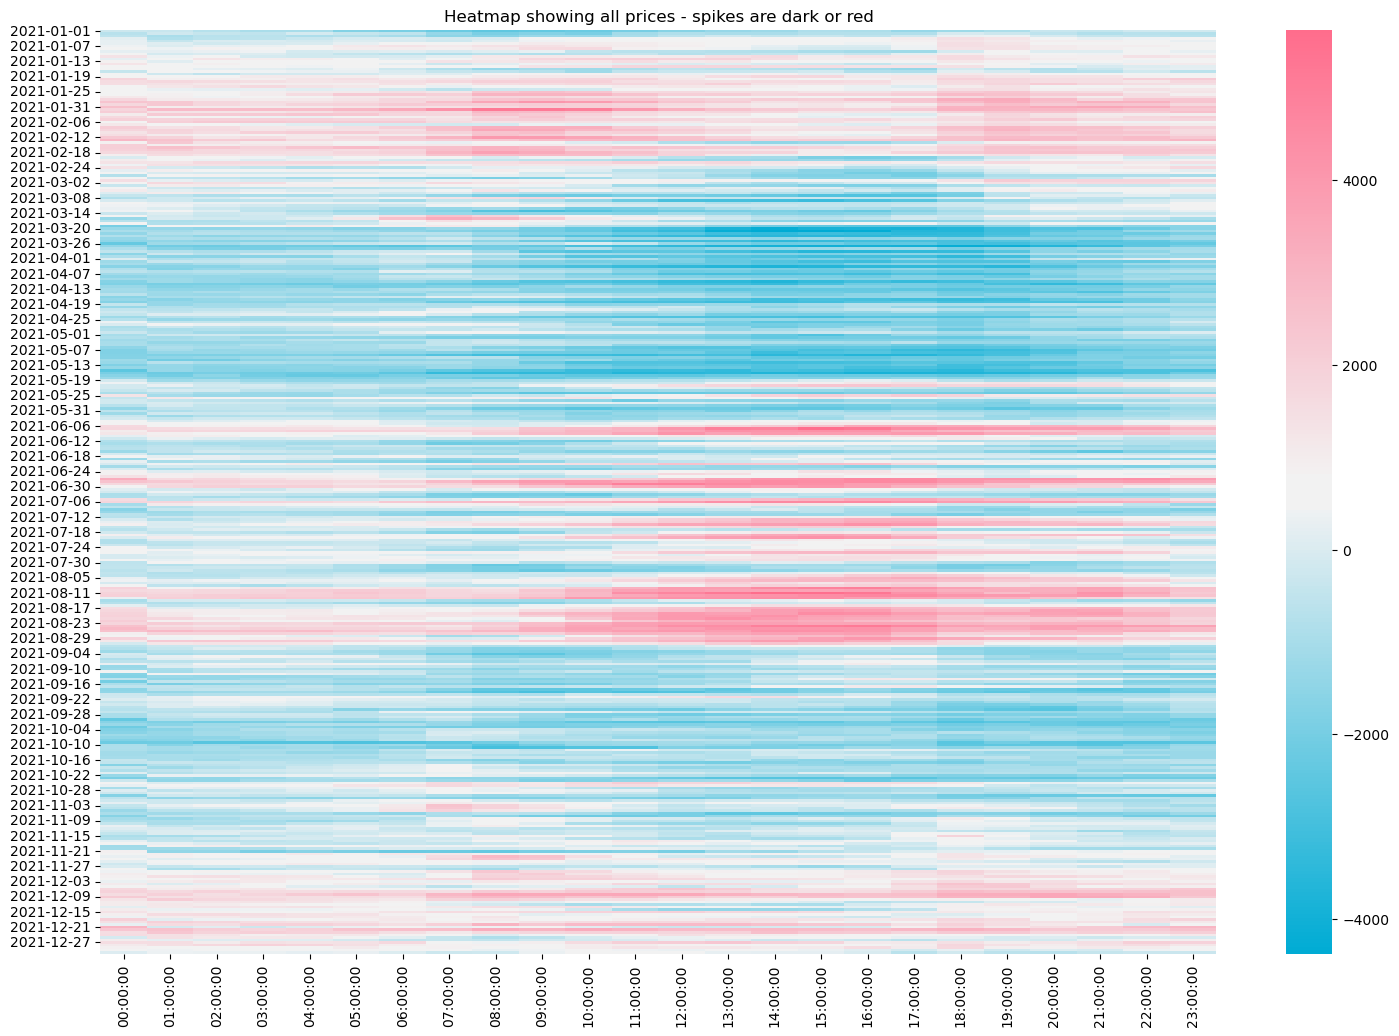

In [165]:
# Set the size of the graph
plt.figure(figsize=(18,12))

# color gradient
cmap = sns.diverging_palette(225, 2, s=100, l=65, sep=10, center="light", as_cmap=True)

# title of the graph
plt.title('Heatmap showing all prices - spikes are dark or red')

# Produce the Seaborn Heat Map
sns.heatmap(output_deviation, cmap = cmap)

Very Cool!

The heatmap above exhibits lighter colors during January (when residents are in need of more electricity because of the cold weather) and during July and August (when residents are in need of more electricity because of very warm temperatures which require air conditioning).

Darker colors can be observed during April and October, when temperatures outside are expected to be fairly close to the temperatures that are considered comfortable room temperatures. In other words, temperatures around 15 degrees celsius to 25 degrees celsius are associated with less than average demand for electricity.

We can safely assume that system administrators seek to adjust the system's output in order to meet anticipated demand (chasing demand ex-post if they fail to adequately meet the anticipate demand).

<hr>
Next, we shall explore ways to extract useful features, for predicting price spikes!

End of notebook 2.